<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 1, 2021

In [86]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [87]:
#used describe function for data exploration
df.describe(include = 'all')

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
count,273240,273240,273240,273240,260820,235980.000000,273240,273240,273240,273240,273240,201085,203133,72155
unique,1,19,19,3,2,NaN,54,12,23,23,10,3442,3525,1
top,07/18/2021,01/01/2020,07/17/2021,By Month,"2,020",NaN,Wyoming,Circulatory diseases,Obesity,J09-J18,0-24,0,0,One or more data cells have counts between 1-9...
freq,273240,37260,37260,235980,161460,NaN,5060,83160,11880,11880,27324,131582,131582,72155
mean,NaN,NaN,NaN,NaN,NaN,5.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.233317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#determine data types for each column
#df.dtypes

#count null values for all columns
#df.isnull().sum(axis = 0)

In [88]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [89]:
#retrieve column counts and group by Age Group
df.groupby('AgeGroup').count()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,CV19_Deaths,Number of Mentions,Flag
AgeGroup,,,,,,,,,,,,,
0-24,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,23564,23624,3760
25-34,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,20881,20986,6443
35-44,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,18788,18985,8536
45-54,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,17232,17496,10092
55-64,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,17243,17526,10081
65-74,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,17904,18195,9420
75-84,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,18345,18623,8979
85+,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,18426,18723,8898
All Ages,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,21505,21778,5819


In [90]:
#drop non-relevant columns
df.drop(['Data As Of', 'Start Date', 'End Date', 'Number of Mentions', 'ICD10_codes', 'Flag'], axis=1, inplace=True)

#drop non-relevant rows
row_index = df[df['Condition'] == 'All other conditions and causes (residual)'].index
df.drop(row_index, inplace = True)

#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
df.dropna(subset = ["Year"], inplace=True)
df.dropna(subset = ["Month"], inplace=True)

#check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)

#remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
df['Year']=df['Year'].str.replace(',','')

#convert remaining values to type float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
df['Year'] = df['Year'].astype(int, errors = 'raise')
df['Month'] = df['Month'].astype(int, errors = 'raise')
display(df)

,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
37262,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9.0
37263,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27.0
37264,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,20.0
37265,By Month,2020,6,United States,Respiratory diseases,Influenza and pneumonia,0-24,18.0
37266,By Month,2020,7,United States,Respiratory diseases,Influenza and pneumonia,0-24,38.0
...,...,...,...,...,...,...,...,...
273234,By Month,2021,2,Puerto Rico,COVID-19,COVID-19,All Ages,132.0
273235,By Month,2021,3,Puerto Rico,COVID-19,COVID-19,All Ages,69.0
273236,By Month,2021,4,Puerto Rico,COVID-19,COVID-19,All Ages,197.0
273237,By Month,2021,5,Puerto Rico,COVID-19,COVID-19,All Ages,182.0


In [91]:
#remove all non-relevant values from State column
df1 = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
#remove all non-relevant values from AgeGroup column
df2 = df1[~df1.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
#remove all non-relevant values from Group column
df3 = df2[~df2.Group.str.contains('By Year|By Total', regex=True)]
display(df3)

,Group,Year,Month,State,Condition Group,Condition,AgeGroup,CV19_Deaths
41680,By Month,2021,1,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,18.0
41692,By Month,2020,6,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,11.0
41693,By Month,2020,7,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,10.0
41694,By Month,2020,8,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,17.0
41697,By Month,2020,11,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,14.0
...,...,...,...,...,...,...,...,...
268822,By Month,2020,10,Wyoming,COVID-19,COVID-19,85+,30.0
268823,By Month,2020,11,Wyoming,COVID-19,COVID-19,85+,56.0
268824,By Month,2020,12,Wyoming,COVID-19,COVID-19,85+,55.0
268825,By Month,2021,1,Wyoming,COVID-19,COVID-19,85+,33.0


In [94]:
import numpy as np

#table = df3.pivot_table(index='Condition', columns='State', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)

#df_stacked = df3.stack()
#display(df_stacked.head(100))

#multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'),
#                                       ('weight', 'pounds')])
#df_multi_level_cols1 = pd.DataFrame([[1, 2], [2, 4]],
#                                    index=['cat', 'dog'],
#                                    columns=multicol1)
#display(df_multi_level_cols1)

multicol1 = pd.df3.from_tuples(['State', 'AgeGroup'])
df_multi_level_cols1 = pd.df3(index=['Condition'], columns=multicol1)
display(df_multi_level_cols1)

AttributeError: ignored

In [49]:
table = df3.pivot_table(index='Condition', columns='AgeGroup', values='CV19_Deaths', aggfunc=np.sum, fill_value = 0)
display(table)

AgeGroup,0-24,25-34,35-44,45-54,55-64,65-74,75-84,85+
Condition,,,,,,,,
Adult respiratory distress syndrome,0,108,635,3286,9703,15236,12364,6766
Alzheimer disease,0,0,0,0,0,391,4533,12077
COVID-19,292,2533,8727,27534,70868,125538,155497,169843
Cardiac arrest,0,142,680,3096,8709,14710,15808,14914
Cardiac arrhythmia,0,0,0,200,1879,6500,12231,15879
Cerebrovascular diseases,0,0,0,272,1810,4872,7034,7971
Chronic lower respiratory diseases,0,0,39,299,3595,11139,15776,13024
Diabetes,0,89,938,4308,13312,23950,23926,15874
Heart failure,0,0,33,230,1975,6342,11645,17562


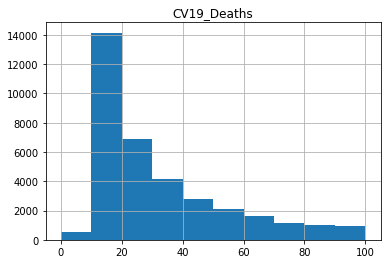

In [48]:
df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,60,70,80,90,100]);